# Assignment - Supervised Learning flow
## Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

**Student details 1:** Tay Shofer 211697107.
**Student details 2:** Daniel Chani 322757840.atails 5:

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Adft-enter AI agent name: Google Gemini"
Other assistance: אין.  
</pre>ssistance: אין.  
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
**Learning Problem:** Binary classification – האם נוסע שרד את הטביעה או לא.

**Dataset:** Titanic dataset (train.csv) מכיל נתונים על כ-890 נוסעים: גיל, מין, מחלקה (Pclass), מספר אחים/בני זוג על הספינה, מספר הורים/ילדים, מחיר כרטיס ועוד.

**Target Variable:** Survived (0 = לא שרד, 1 = שרד).

**AI agent name:** Google Gemini, ChatGPT

**Goal:** לחזות את הסיכוי של נוסע לשרוד לפי המאפיינים האישיים שלו.re> שלו.
</pre>

5 השורות הראשונות של ה-trainset:

5 השורות הראשונות של ה-testset:

מידע בסיסי על ה-trainset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


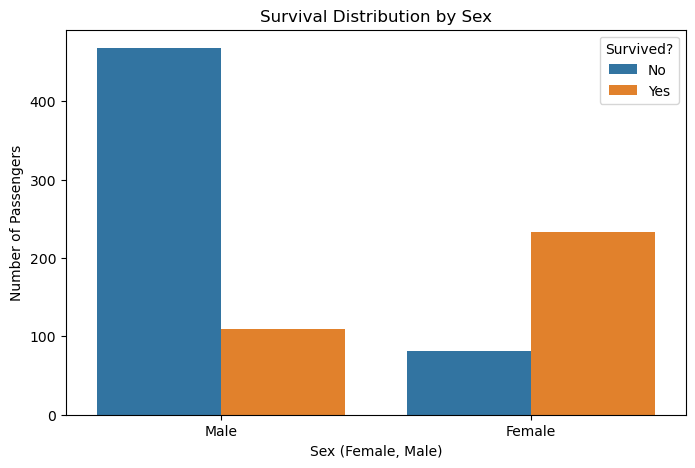

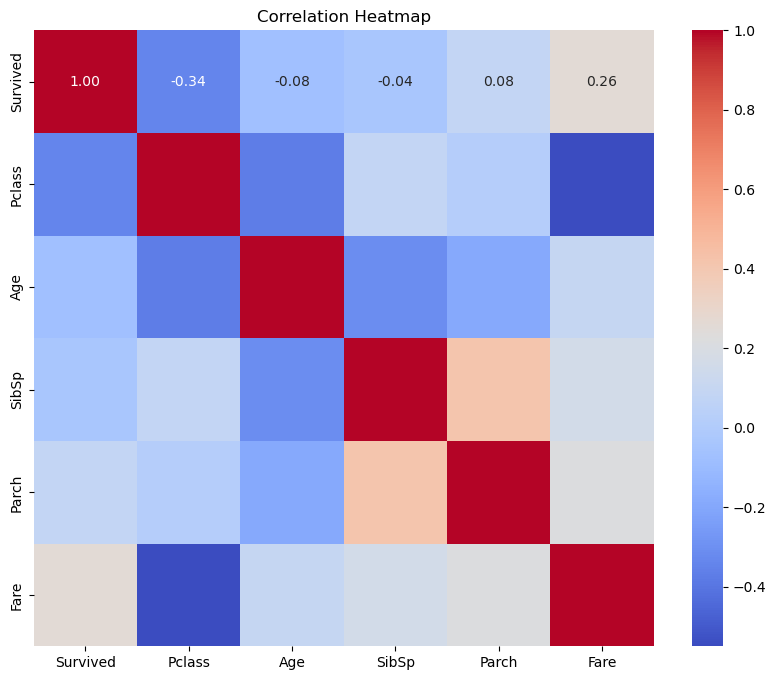

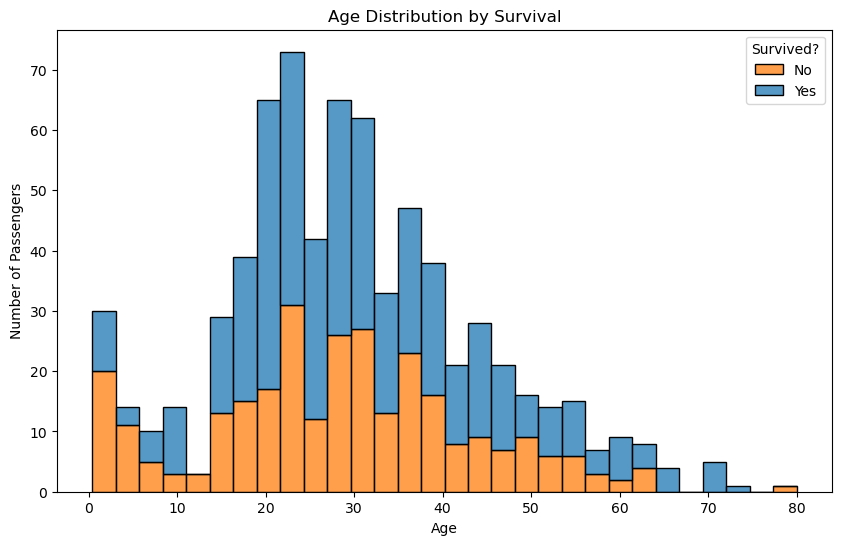

In [1]:
# ייבוא ספריות נדרשות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Part 2 - Initial Preparations
# טעינת הנתונים
# חשוב לוודא שקובץ ה-CSV נמצא באותה תיקיה של המחברת
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# הצגת 5 השורות הראשונות של ה-trainset
print("5 השורות הראשונות של ה-trainset:")
train_df.head()

# הצגת 5 השורות הראשונות של ה-testset
print("\n5 השורות הראשונות של ה-testset:")
test_df.head()

# המרת עמודת Survived לטיפוס מחרוזת לצורך ויזואליזציה נכונה
train_df['Survived'] = train_df['Survived'].astype(str)

# EDA - Exploratory Data Analysis
print("\nמידע בסיסי על ה-trainset:")
train_df.info()

# ויזואליזציה 1: התפלגות השרידה לפי מין
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex (Female, Male)')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived?', labels=['No', 'Yes'])
plt.show()

# ויזואליזציה 2: מפת חום של קורלציות בין מאפיינים מספריים
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# ויזואליזציה 3: התפלגות גיל הנוסעים לפי שרידה
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived?', labels=['No', 'Yes'])
plt.show()

In [2]:
# Part 3 - Experiments
# הגדרת המאפיינים הקטגוריאליים והמספריים
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# המרה של עמודת ה-target בחזרה למספרים
y_train_full = train_df[target].astype(int)
X_train_full = train_df[features]
X_test_full = test_df[features]

# טיפול בערכים חסרים
X_train_full['Age'] = X_train_full['Age'].fillna(X_train_full['Age'].median())
X_train_full['Embarked'] = X_train_full['Embarked'].fillna(X_train_full['Embarked'].mode()[0])

X_test_full['Age'] = X_test_full['Age'].fillna(X_test_full['Age'].median())
X_test_full['Fare'] = X_test_full['Fare'].fillna(X_test_full['Fare'].median())
X_test_full['Embarked'] = X_test_full['Embarked'].fillna(X_test_full['Embarked'].mode()[0])

# הגדרת Preprocessing pipelines
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# הגדרת המודלים והפרמטרים ל-Grid Search
pipelines = {
    'RandomForest': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    'LogisticRegression': Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000))]),
    'SVC': Pipeline([('preprocessor', preprocessor), ('classifier', SVC(random_state=42))])
}

# הגדרת טווחי הפרמטרים ל-Grid Search עבור כל מודל
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0]
    },
    'SVC': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# ביצוע Grid Search עם 5-fold cross-validation
best_models = {}
for name, pipeline in pipelines.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_full, y_train_full)
    best_models[name] = grid_search
    print(f"Finished {name}. Best F1-score: {grid_search.best_score_:.4f}, Best params: {grid_search.best_params_}")

# יצירת DataFrame להצגת תוצאות כל הניסויים
results_data = []
for name, grid in best_models.items():
    for i in range(len(grid.cv_results_['params'])):
        results_data.append({
            'Model': name,
            'Parameters': grid.cv_results_['params'][i],
            'Mean F1-score': grid.cv_results_['mean_test_score'][i]
        })

results_df = pd.DataFrame(results_data).sort_values(by='Mean F1-score', ascending=False)
print("\nטבלת סיכום של כל הניסויים:")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

Running GridSearchCV for RandomForest...
Finished RandomForest. Best F1-score: 0.7599, Best params: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Running GridSearchCV for LogisticRegression...
Finished LogisticRegression. Best F1-score: 0.7190, Best params: {'classifier__C': 1.0}
Running GridSearchCV for SVC...
Finished SVC. Best F1-score: 0.7584, Best params: {'classifier__C': 1.0, 'classifier__kernel': 'rbf'}

טבלת סיכום של כל הניסויים:
| Model              | Parameters                                                       | Mean F1-score   |
|:-------------------|:-----------------------------------------------------------------|:----------------|
| RandomForest       | {'classifier__max_depth': 10, 'classifier__n_estimators': 50}    | 0.759919        |
| RandomForest       | {'classifier__max_depth': 10, 'classifier__n_estimators': 200}   | 0.759806        |
| RandomForest       | {'classifier__max_depth': 10, 'classifier__n_estimators': 100}   | 0.759088        |
|

In [3]:
# Part 4 - Training
# בחירת המודל הטוב ביותר מתוך טבלת התוצאות
best_result = results_df.iloc[0]
best_model_name = best_result['Model']
best_params = best_result['Parameters']

# הדפסת פרמטרים של המודל הנבחר
print(f"המודל הטוב ביותר לשימוש הוא: {best_model_name}")
print(f"הפרמטרים שלו הם: {best_params}")

# אימון מחדש של המודל הטוב ביותר על כל ה-trainset
best_pipeline = pipelines[best_model_name]
best_pipeline.set_params(**best_params)
best_pipeline.fit(X_train_full, y_train_full)
print("\nהמודל הטוב ביותר אומן מחדש על כל ה-trainset בהצלחה.")

המודל הטוב ביותר לשימוש הוא: RandomForest
הפרמטרים שלו הם: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}

המודל הטוב ביותר אומן מחדש על כל ה-trainset בהצלחה.


5 חיזויים ראשונים על ה-test set:
[0 0 0 0 1]

Classification Report על ה-trainset המלא:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       549
           1       0.97      0.87      0.91       342

    accuracy                           0.94       891
   macro avg       0.94      0.92      0.93       891
weighted avg       0.94      0.94      0.94       891

מדד F1-score ממוצע על ה-trainset המלא: 0.9321


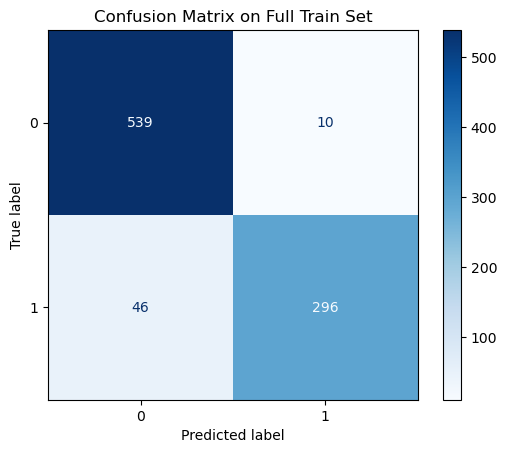

In [4]:
# Part 5 - Apply on test and show model performance estimation
# חיזוי על ה-test set
y_pred = best_pipeline.predict(X_test_full)

# הצגת 5 החיזויים הראשונים
print("5 חיזויים ראשונים על ה-test set:")
print(y_pred[:5])

# הערכת איכות המודל על ה-trainset המלא (להמחשה)
y_train_pred = best_pipeline.predict(X_train_full)
print("\nClassification Report על ה-trainset המלא:")
print(classification_report(y_train_full, y_train_pred))

# הצגת מדד F1-score
f1_score_train = f1_score(y_train_full, y_train_pred, average='macro')
print(f"מדד F1-score ממוצע על ה-trainset המלא: {f1_score_train:.4f}")

# הצגת Confusion Matrix
cm = confusion_matrix(y_train_full, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Full Train Set')
plt.show()